In [1]:
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model=LinearRegression()

<ipython-input-1-27b9c728269a>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
median_bedrooms = df['bedrooms'].median()
print(median_bedrooms)


4.0


In [6]:
df['bedrooms']=df['bedrooms'].fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
df.describe()

,area,bedrooms,age,price
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,4.166667,16.500000,648333.333333
std,587.934237,1.169045,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.250000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,4.750000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [8]:
corr=df.corr()
df.corr()

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


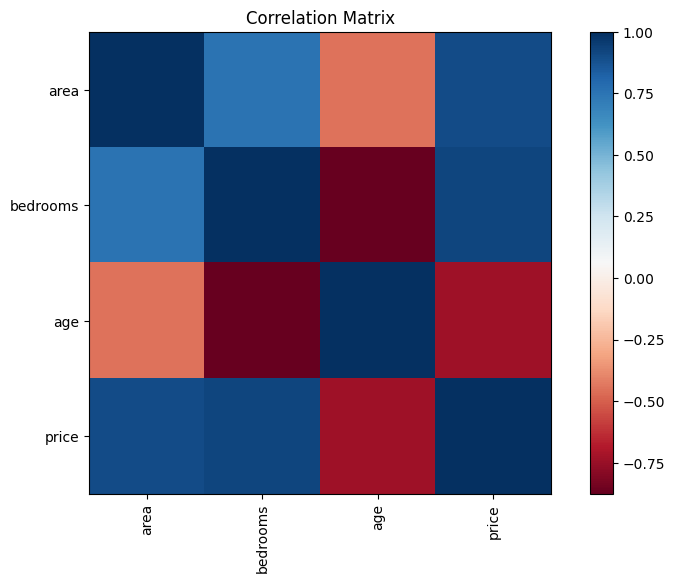

In [9]:
plt.figure(figsize=(10, 6))

# Plot the correlation matrix using imshow
plt.imshow(corr, cmap='RdBu', interpolation='nearest')
plt.colorbar()

# Set axis labels and title
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [10]:
model.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [11]:
model.predict([[2500,4,5]])

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [19]:
%pip install joblib
import joblib

In [26]:
joblib.dump(model,'model_joblib')
mj=joblib.load('model_joblib')
mj.predict([[2500,4,5]])

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])